In [1]:
import sys
import os

cd = os.getcwd()
wd = os.path.dirname(cd)
sys.path.append(os.path.join(wd,'bin'))

import libsbml
import importlib
import amici
import numpy as np
import re
import pandas as pd
from antimony import *


# Optional packages to import
import amici.plotting
import matplotlib.pyplot as plt
from time import time
import matplotlib as mpl


mpl.rcParams['figure.dpi'] = 120

In [2]:
#%% benchmark - one4all
fnameInput2 = 'SPARCEDo4a_v1' # model file name = USER input
sbml_file2 = fnameInput2+'.xml'
model_name2 = sbml_file2[0:-4] 
model_output_dir2 = model_name2 
sys.path.insert(0, os.path.join(cd,model_output_dir2))
model_module2 = importlib.import_module(model_name2)
model2 = model_module2.getModel()

solver2 = model2.getSolver()
solver2.setMaxSteps = 1e10

th2 = 72*3600
model2.setTimepoints(np.linspace(0,th2,1000))

species_all2 = list(model2.getStateIds())


spIn_o4a = np.array(model_module2.getModel().getInitialStates())


STIMligs = [1.0,0.0,0.005,0.0,0.0,0.0,0.0] # EGF, Her, HGF, PDGF, FGF, IGF, INS

STIMligs_id = ['E', 'H', 'HGF', 'P', 'F', 'I', 'INS']

for s,sp in enumerate(STIMligs_id):
    spIn_o4a[species_all2.index(sp)] = STIMligs[s]


model2.setInitialStates(spIn_o4a)

sbml_reader = libsbml.SBMLReader()
sbml_doc2 = sbml_reader.readSBML(sbml_file2)
sbml_model2 = sbml_doc2.getModel()


In [3]:
rdata_o4a = amici.runAmiciSimulation(model2,solver2)
    


xoutS_all5 = rdata_o4a['x']
tout_all5 = rdata_o4a['t']

In [4]:
def timecourse_x(rdata,sp,species_all):
    x_t = rdata['x'][:,species_all.index(sp)]
    tout = rdata['t']/3600
    
    plt.plot(tout,x_t)
    plt.ylim(0,max(x_t)*1.25)
    plt.xlabel('Time (hours)')
    plt.ylabel(str(sp))
    plt.show()

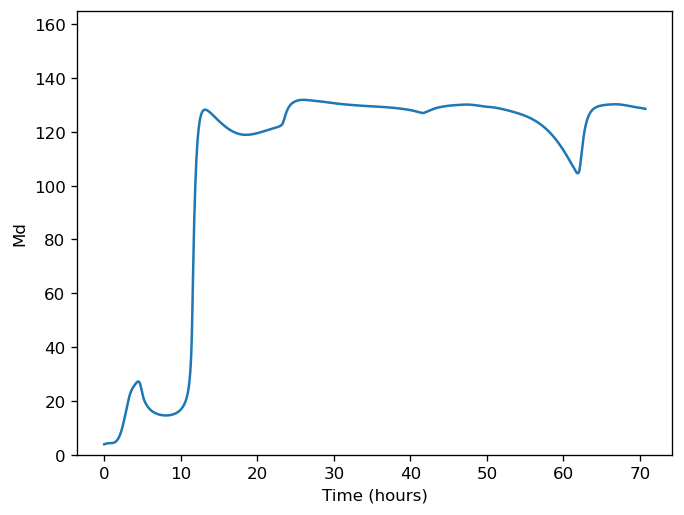

In [7]:
timecourse_x(rdata_o4a,'Md',species_all2)